In [1]:
# Part I: Segmentation

# I. Bring the dataset titled lobster_club.csv into your local environment in Jupyter 
# Notebook. This dataset contains information about 654 different members of the Lobster 
# Club, a group of Lobster Land fans who have signed up to receive emails and push notifications
# regarding online merchandise offerings.

# For this assignment, you will build an RFM model for Lobster Land. RFM stands for “Recency, 
# Frequency, and Monetary.” The variables in this dataset contain information about Lobster 
# Club members’ total spending, the frequency of their site visits and purchases in the past 
# year, and the recency of their interactions with the online merch store.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lc = pd.read_csv("lobster_club_rfm.csv")
lc.head()

,customerID,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
0,1,27,21,35,25,90.73,54.88
1,2,29,12,25,13,112.33,76.44
2,3,18,5,45,42,67.85,49.11
3,4,31,18,33,34,107.51,86.25
4,5,20,20,27,21,109.98,80.86


In [2]:
# A. Drop the customerID variable: 

lc2 = lc.drop(columns = 'customerID')
lc2.head()

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
0,27,21,35,25,90.73,54.88
1,29,12,25,13,112.33,76.44
2,18,5,45,42,67.85,49.11
3,31,18,33,34,107.51,86.25
4,20,20,27,21,109.98,80.86


a. Why will customerID not be relevant in a clustering model? In your answer, do not just write “it will confuse the model.” Instead, take the time to explain this with a sentence or two, using a bit of math and your understanding of Euclidean distance.

Each customer ID is unique, it represents a name of a customer. When calculating the Euclidean distance, the customer ID is like the person's name in the example from the lecture. The distance from customer ID 100 to customer ID 1 is not the actual distance and has no meaning. Therefore, it will confuse the model if we do not drop the column of customerID.

In [3]:
# B. Call the describe() function on your dataset:

lc2.describe()

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,27.108563,18.940367,32.619266,25.403670,72.192722,42.947691
std,7.482424,11.788896,6.254946,7.169724,21.354962,23.231503
min,8.000000,0.000000,8.000000,1.000000,11.820000,-17.250000
25%,22.000000,10.000000,29.000000,21.000000,57.495000,27.375000
50%,26.000000,18.000000,33.000000,26.000000,71.860000,42.565000
75%,31.000000,26.000000,37.000000,30.000000,86.485000,58.767500
max,60.000000,60.000000,52.000000,48.000000,137.720000,122.390000


a. How does this function help you to gain an overall sense of the columns and values in this (or any other) dataset? Why is this valuable for any analyst who will use a dataset to build a model?

By running this function, I learned the overall count, mean, standard deviation, and min and max value of each variable. I had a better understanding of what to expect from this data set. 

This is valuable for the analyst because it will calculate all the numerical values, so the analyst can find the data type. Plus, the analyst can find if there are any impossible values such as the min of total_dollars_other is -17. It is impossible to have -17 dollars on an estimate of the amount of gift spending at the online merch store made by a person in the past 365 days. 

In [4]:
# C. Missing values/impossible values

# a. Does this dataset contain any missing values? If so, how many? Which columns have 
# missing values?

lc2.isnull().sum().sum()

0

There is no missing values in the data set. 

In [5]:
# b. What about impossible values? 

# pd.set_option('display.max_rows', None)
# I hided above code for better printing view. I looked up all values. 
(lc2 >= 0).all(1)

0      True
1      True
2      True
3      True
4      True
       ... 
649    True
650    True
651    True
652    True
653    True
Length: 654, dtype: bool

Do you see any impossible values here?

I do see some impossible values in the data set. There are 26 negative numbers in the total_dollars_other column. They are row 71, 96, 103, 105, 164, 182, 184, 218, 240, 256, 264, 278, 279, 322, 372, 382, 426, 438, 510, 517, 520, 538, 544, 571, 617, 629. It is impossible to have negative dollars on an estimate of the amount of gift spending at the online merch store made by a person in the past 365 days.

In [6]:
# If so, handle them in any way that you see fit:

lc3 = abs(lc2)
# pd.set_option('display.max_rows', None)
# I hide above code for better printing view. I looked up all values.
(lc3 >= 0).all(1)

0      True
1      True
2      True
3      True
4      True
       ... 
649    True
650    True
651    True
652    True
653    True
Length: 654, dtype: bool

Why did you take this approach?

I think it was a typo, so I took the absolute value of the data set. Now, there are no negative values. 

D. Data scaling.

a. Do your variables need to be standardized? Why or why not?

Variables need to be standardized, because I need to make sure all variables contribute evenly to a scale when items are added together, or to make it easier to interpret results of a regression or other analysis. The data set are not like the outdoor activity survey example for the lecture where all of the values reflect survey responses from 1 to 10.

Reference

Bruin, J. 2006. newtest: command to compute new test. UCLA: Statistical Consulting Group.

https://stats.oarc.ucla.edu/stata/faq/how-do-i-standardize-variables-in-stata/

In [7]:
# b. If your data requires standardization, use Python to convert your values into z-scores, 
# and store the normalized data in a new dataframe. If not, proceed to the next step without 
# changing the variables:

from sklearn.cluster import KMeans
from sklearn import preprocessing

zscore = preprocessing.StandardScaler()
lc_standard = zscore.fit_transform(lc3)
lc_standard = pd.DataFrame(lc_standard)
lc_standard.columns = lc3.columns

round(lc_standard.describe(), 2)

# All the means have become 0, and all the standard deviations have become 1.

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
count,654.00,654.00,654.00,654.00,654.00,654.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.56,-1.61,-3.94,-3.41,-2.83,-1.95
25%,-0.68,-0.76,-0.58,-0.61,-0.69,-0.72
50%,-0.15,-0.08,0.06,0.08,-0.02,-0.04
75%,0.52,0.60,0.70,0.64,0.67,0.69
max,4.40,3.49,3.10,3.15,3.07,3.55


In [8]:
lc_standard.head()

# Looking at the first five rows of the standardized data, we can see a blend of positive 
# and negative numbers. This is expected, as any values below their column mean become 
# negative as a result of the transformation to z-scores.

# Reference
# Lobster Land text book

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
0,-0.014520,0.174843,0.380908,-0.056345,0.868719,0.513492
1,0.252978,-0.589171,-1.219051,-1.731331,1.880968,1.482171
2,-1.218260,-1.183405,1.980866,2.316551,-0.203515,0.254249
3,0.520475,-0.079828,0.060916,1.199894,1.655087,1.922928
4,-0.950762,0.089953,-0.899059,-0.614674,1.770839,1.680759


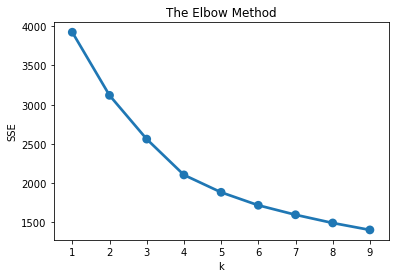

In [9]:
# E. Elbow chart.
# a. Build an elbow chart to help give you a sense of how you might build your model.

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(lc_standard)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()));

In [10]:
# F. How many clusters will you use for your k-means model? (Remember, as noted in several 
# places throughout the course material, there is no “right” answer to this question. You 
# may wish to answer this immediately after seeing your elbow plot, or after doing some more 
# experimentation):  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(lc_standard)
cluster_labels = kmeans.labels_

lc_standard2 = lc_standard.assign(Cluster = cluster_labels)
lc_standard2.groupby(['Cluster']).agg({
    'days_since_purch': 'mean', 
    'days_since_sitevisit': 'mean',
    'total_visits_yr': 'mean', 
    'total_purch_yr': 'mean', 
    'total_dollars_yr': 'mean',
    'total_dollars_other': 'mean'
}).round(2)

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
Cluster,,,,,,
0,-0.36,-0.36,-0.88,-0.96,-0.28,-0.30
1,-0.28,-0.25,0.32,0.34,1.07,1.09
2,1.47,1.50,-0.15,-0.12,-0.06,-0.08
3,-0.32,-0.36,0.79,0.83,-0.70,-0.69


In [11]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(lc_standard)
cluster_labels = kmeans.labels_

lc_standard2 = lc_standard.assign(Cluster = cluster_labels)
lc_standard2.groupby(['Cluster']).agg({
    'days_since_purch': 'mean', 
    'days_since_sitevisit': 'mean',
    'total_visits_yr': 'mean', 
    'total_purch_yr': 'mean', 
    'total_dollars_yr': 'mean',
    'total_dollars_other': 'mean'
}).round(2)

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
Cluster,,,,,,
0,-0.41,-0.34,-1.19,-1.20,0.55,0.54
1,-0.45,-0.46,0.89,0.93,-0.59,-0.58
2,1.63,1.63,0.01,0.04,0.14,0.13
3,0.05,-0.02,-0.50,-0.56,-0.91,-0.92
4,-0.31,-0.29,0.49,0.49,0.96,0.96


From the elbow chart, 4 seems a good number of clusters. After two experiments, I still decided to use 4 clusters for my model. 

In [12]:
# G. Build a k-means model with your desired number of clusters:

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(lc_standard)
cluster_labels = kmeans.labels_

lc_standard2 = lc_standard.assign(Cluster = cluster_labels)
lc_standard2.groupby(['Cluster']).agg({
    'days_since_purch': 'mean', 
    'days_since_sitevisit': 'mean',
    'total_visits_yr': 'mean', 
    'total_purch_yr': 'mean', 
    'total_dollars_yr': 'mean',
    'total_dollars_other': 'mean'
}).round(2)

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
Cluster,,,,,,
0,-0.36,-0.36,-0.88,-0.96,-0.28,-0.30
1,-0.28,-0.25,0.32,0.34,1.07,1.09
2,1.47,1.50,-0.15,-0.12,-0.06,-0.08
3,-0.32,-0.36,0.79,0.83,-0.70,-0.69


<AxesSubplot:xlabel='total_visits_yr', ylabel='total_purch_yr'>

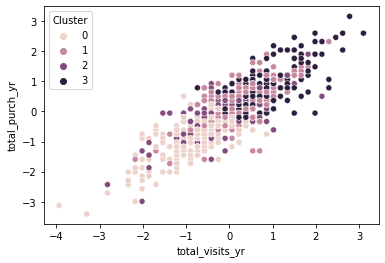

In [13]:
# H. Generate and show summary statistics about each of your clusters:

sns.scatterplot(x = 'total_visits_yr', y = 'total_purch_yr', 
                hue = 'Cluster', data = lc_standard2 )

<AxesSubplot:xlabel='total_dollars_yr', ylabel='total_dollars_other'>

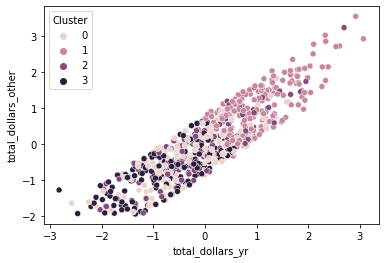

In [14]:
sns.scatterplot(x = 'total_dollars_yr', y = 'total_dollars_other', 
                hue = 'Cluster', data = lc_standard2 )

<AxesSubplot:xlabel='days_since_purch', ylabel='days_since_sitevisit'>

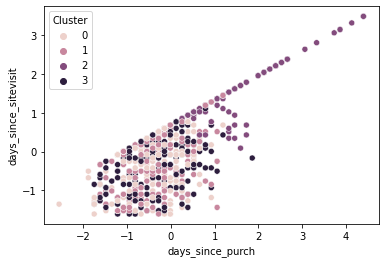

In [15]:
sns.scatterplot(x = 'days_since_purch', y = 'days_since_sitevisit', 
                hue = 'Cluster', data = lc_standard2 )

<AxesSubplot:ylabel='Cluster'>

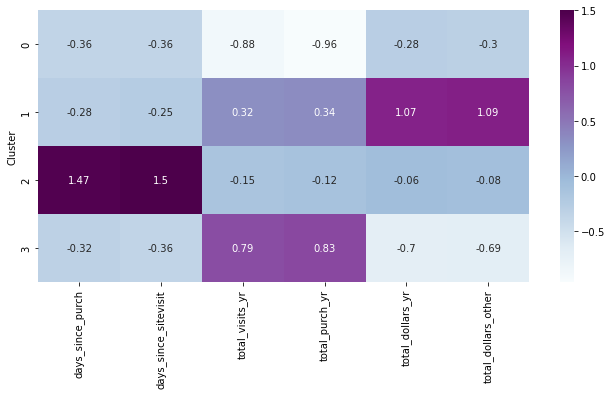

In [16]:
summary = lc_standard2.groupby(['Cluster']).agg({
    'days_since_purch': 'mean', 
    'days_since_sitevisit': 'mean',
    'total_visits_yr': 'mean', 
    'total_purch_yr': 'mean', 
    'total_dollars_yr': 'mean',
    'total_dollars_other': 'mean'
}). round(2)

plt.figure(figsize = (11, 5))
sns.heatmap(summary, annot = True, cmap = 'BuPu', fmt = 'g')

In [17]:
# I. Build any four simple visualizations to help management better understand your 
# clusters (a simple visualization could be a histogram, a barplot, a scatterplot, etc. 
# – it should show original variables from the dataset) You may wish to facet your
# visualizations by cluster. For each one of your visualizations, include 2-3 sentences 
# of description/ explanation. What does it show about your model?

lc_standard2 = lc_standard.assign(Cluster = cluster_labels)
lc_standard2.dtypes

days_since_purch        float64
days_since_sitevisit    float64
total_visits_yr         float64
total_purch_yr          float64
total_dollars_yr        float64
total_dollars_other     float64
Cluster                   int32
dtype: object

In [18]:
lc_standard2['Cluster'] = lc_standard2['Cluster'].astype('category')
lc_standard2['Cluster'] = lc_standard2['Cluster'].cat.rename_categories({
    0: 'Low visit & purchase', 1: 'High spend', 2: 'Inactived', 3: 'Window shopper'})
lc_standard2.dtypes

days_since_purch         float64
days_since_sitevisit     float64
total_visits_yr          float64
total_purch_yr           float64
total_dollars_yr         float64
total_dollars_other      float64
Cluster                 category
dtype: object

<AxesSubplot:title={'center':'Average total dollars per year'}, xlabel='total_dollars_yr', ylabel='Cluster'>

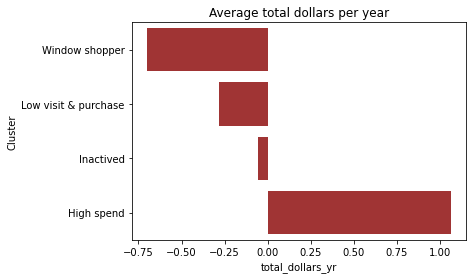

In [19]:
# Barplot

order = lc_standard2.groupby(['Cluster'])['total_dollars_yr'].mean().sort_values().index
plt.title('Average total dollars per year')
sns.barplot(y = 'Cluster', x = 'total_dollars_yr', ci = None, order = order, 
            color = 'firebrick', data = lc_standard2)

This plot showed that the high spend cluster has the highest total number of dollars spent at the online merch store in the past 365 days. Window shopper cluster has the lowest total number of dollars spent at the online merch store in the past 365 days. 

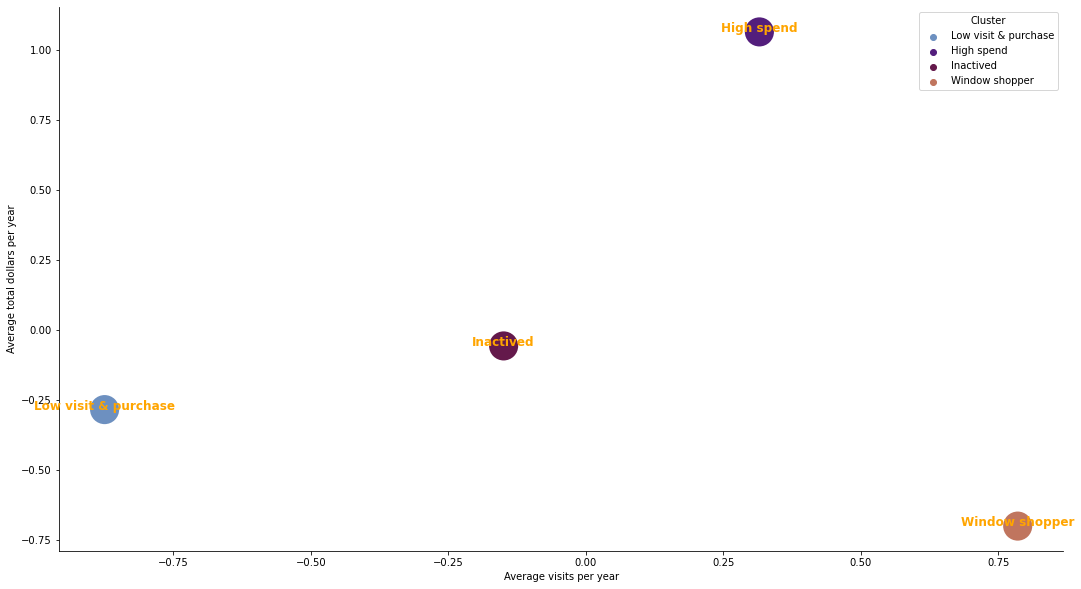

In [20]:
# Scatterplot

discretionary = lc_standard2.groupby('Cluster')[['total_visits_yr', 'total_dollars_yr']].mean()

plt.figure(figsize = (18, 10))
plt.xlabel('Average visits per year')
plt.ylabel('Average total dollars per year')
sns.despine()

p1 = sns.scatterplot(x = 'total_visits_yr', y = 'total_dollars_yr', 
                     s = 1000, hue = 'Cluster', palette = 'twilight', data = discretionary)

for line in range(0, discretionary.shape[0]):
    p1.text(discretionary.total_visits_yr[line], 
            discretionary.total_dollars_yr[line], 
            discretionary.index[line], horizontalalignment = 'center', 
            size = 'large', color = 'orange', weight = 'semibold')

The previous plot only has the total dollars spent in the past 365 days. Now I added the number of times that the person visited the Lobster Land online merch store in the past 365 days. The window shopper cluster has the highest number of visits but the lowest total spent. The high spend cluster has the second highest visits and the highest total dollars spent.

<AxesSubplot:ylabel='Cluster'>

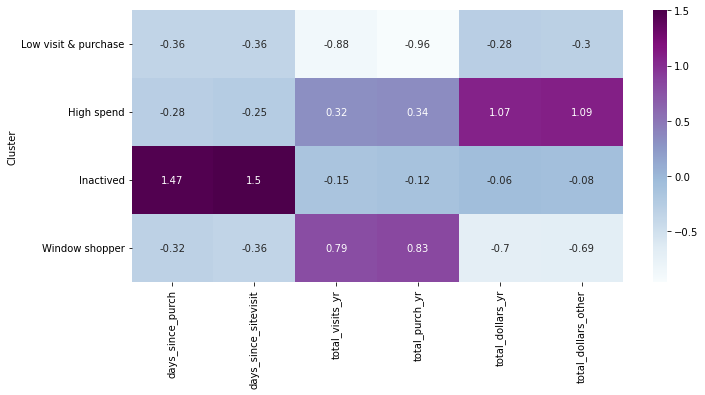

In [21]:
# Heatmap

summary = lc_standard2.groupby(['Cluster']).agg({
    'days_since_purch': 'mean', 
    'days_since_sitevisit': 'mean',
    'total_visits_yr': 'mean', 
    'total_purch_yr': 'mean', 
    'total_dollars_yr': 'mean',
    'total_dollars_other': 'mean'
}). round(2)

plt.figure(figsize = (11, 5))
sns.heatmap(summary, annot = True, cmap = 'BuPu', fmt = 'g')

This is an overall view of four clusters. The low visit & purchase cluster has the lowest visits and purchases. The high spend cluster has the highest dollars spent and the highest dollars others spent. The inactivated cluster is the most people that did not visit the store and did not purchase anything in the past 365 days. The window shopper cluster has the highest visits to the store and the highest total number of purchases but their total money spent was the lowest. 

In [22]:
# Boxplot

totalpurchase = lc_standard2[(lc_standard2['Cluster'] == 'Low visit & purchase')|
                             (lc_standard2['Cluster'] == 'High spend')|
                             (lc_standard2['Cluster'] == 'Inactived')|
                             (lc_standard2['Cluster'] == 'Window shopper')]

totalpurchase.Cluster.value_counts()

Low visit & purchase    195
High spend              171
Window shopper          171
Inactived               117
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='days_since_sitevisit', ylabel='Cluster'>

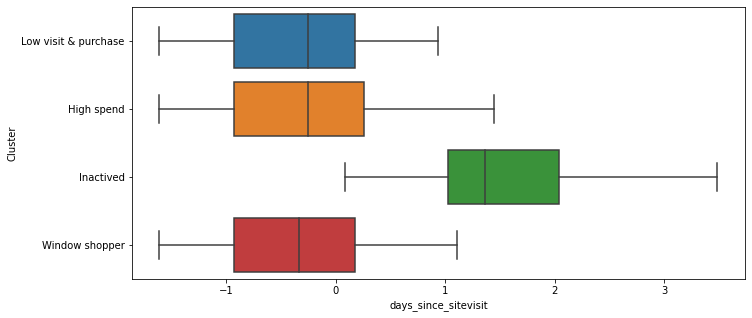

In [23]:
plt.figure(figsize = (11, 5))
order = ['Low visit & purchase', 'High spend', 'Inactived', 'Window shopper']
sns.boxplot (y = 'Cluster', x = 'days_since_sitevisit', order = order, data = lc_standard2)

I used box plot to show the clusters with the number of days that have elapsed since the customer last visited the Lobster Land online merch store. We can tell the inactived cluster has the most days. The other three has about the same days. 

J. Give a descriptive name to each one of your clusters, along with a few sentences of explanation for the name that you chose. As you describe each segment, think about the types of customers likely to belong to each group. For each cluster, also include a couple sentences about targeting. How can Lobster Land reach this group, specifically? (Note: You can exercise some ‘creative freedom’ here with this answer. Do not just say “send them a coupon” as your answer for each segment).

I already named them in the previous step. 

The low visit & purchase cluster has the lowest visits and purchases. To reach this cluster, we can send them notifications such as email along with a coupon. My friend interned at Taobao, she said it will increase by 30% to 50% of the sales with a 1% to 5% off coupon. But the most accurate way is to use the AB test based on different types of products. 

The high spend cluster has the highest dollars spent and the highest dollars others spent. To reach this cluster, we can create a loyalty program. For example, every dollar the person spent can receive 1 reward point. Every 100 points are equal to 10 dollars.   

The inactivated cluster is the most people that did not visit the store and did not purchase anything in the past 365 days. To reach this cluster, we can expand our advertising. Even if they forgot us, we will find a way to remind you!

The window shopper cluster has the highest visits to the store and the highest total number of purchases but their total money spent was the lowest. To reach this cluster, we can offer them some free items if they make a purchase. Also, we can give them time-limited offers.

In [24]:
# Part II: Conjoint Analysis with a Linear Model
# A. Read the dataset haunted_hayride.csv into your local environment in Jupyter Notebook:

hh = pd.read_csv("haunted_hayride.csv")
hh.head()

,bundleID,paxpercar,total_dark_time,flashing_lights,theme,total_time,ghost_touch,no_phone_zone,avg_rating
0,0,4,0,Yes,Pumpkin_Terror,120,Yes,Yes,5.455046
1,1,4,0,Yes,Pumpkin_Terror,120,Yes,No,4.354482
2,2,4,0,Yes,Pumpkin_Terror,120,No,Yes,5.186594
3,3,4,0,Yes,Pumpkin_Terror,120,No,No,9.282721
4,4,4,0,Yes,Pumpkin_Terror,240,Yes,Yes,5.205072


In [25]:
hh.dtypes

bundleID             int64
paxpercar            int64
total_dark_time      int64
flashing_lights     object
theme               object
total_time           int64
ghost_touch         object
no_phone_zone       object
avg_rating         float64
dtype: object

B. Based on the descriptions shown above, which of your variables are numeric, and which are categorical? (The standard you should use when answering this is that something that is both represented by a number, and for which that number has valid mathematical meaning, is numeric).

Numeric: paxpercar, total_dark_time, total_time, avg_rating

Categorical: bundleID(it is categorical because it is a unique ID), flashing_lights, theme, ghost_touch, no_phone_zone

In [26]:
# C. After first removing the bundleID variable, use the pandas get_dummies() function in
# order to prepare the remaining variables for use in a linear model. Inside this function, 
# include this argument: drop_first = True. Doing this will save us from the multicollinearity 
# problem that would make our model unreliable. Be sure to dummify ALL of your input 
# variables, even the numeric ones: 

hh2 = hh.drop(columns = 'bundleID')
hh2

,paxpercar,total_dark_time,flashing_lights,theme,total_time,ghost_touch,no_phone_zone,avg_rating
0,4,0,Yes,Pumpkin_Terror,120,Yes,Yes,5.455046
1,4,0,Yes,Pumpkin_Terror,120,Yes,No,4.354482
2,4,0,Yes,Pumpkin_Terror,120,No,Yes,5.186594
3,4,0,Yes,Pumpkin_Terror,120,No,No,9.282721
4,4,0,Yes,Pumpkin_Terror,240,Yes,Yes,5.205072
...,...,...,...,...,...,...,...,...
859,12,12,No,Vampire,240,No,No,7.131886
860,12,12,No,Vampire,420,Yes,Yes,3.416271
861,12,12,No,Vampire,420,Yes,No,1.861245
862,12,12,No,Vampire,420,No,Yes,3.886112


In [27]:
hh2.isnull().values.any()

False

In [28]:
hh2.sort_values(by = 'avg_rating', ascending = False)

,paxpercar,total_dark_time,flashing_lights,theme,total_time,ghost_touch,no_phone_zone,avg_rating
43,4,0,Yes,Vampire,240,No,No,9.972176
667,12,0,No,Vampire,240,No,No,9.960121
38,4,0,Yes,Vampire,120,No,Yes,9.958073
22,4,0,Yes,Prison,420,No,Yes,9.937104
587,12,0,Yes,Pumpkin_Terror,420,No,No,9.890697
...,...,...,...,...,...,...,...,...
68,4,0,No,Prison,420,Yes,Yes,1.861245
212,4,12,Yes,Prison,420,Yes,Yes,1.861245
345,8,0,No,Pumpkin_Terror,420,Yes,No,1.861245
200,4,12,Yes,Pumpkin_Terror,420,Yes,Yes,1.861245


In [29]:
hh3 = pd.get_dummies(hh2, drop_first = True, 
                     columns = ['paxpercar', 'total_dark_time', 'flashing_lights', 'theme', 
                                'total_time', 'ghost_touch', 'no_phone_zone'])

In [30]:
hh3.head()

,avg_rating,paxpercar_8,paxpercar_12,total_dark_time_7,total_dark_time_12,flashing_lights_Yes,theme_Pumpkin_Terror,theme_Vampire,theme_Zombie Apocalypse,total_time_240,total_time_420,ghost_touch_Yes,no_phone_zone_Yes
0,5.455046,0,0,0,0,1,1,0,0,0,0,1,1
1,4.354482,0,0,0,0,1,1,0,0,0,0,1,0
2,5.186594,0,0,0,0,1,1,0,0,0,0,0,1
3,9.282721,0,0,0,0,1,1,0,0,0,0,0,0
4,5.205072,0,0,0,0,1,1,0,0,1,0,1,1


a. Why should the numeric input variables based on this survey data be dummified?

This way, the model will treat the values for these variables as a series of specific discrete options, rather than as a continuous range.

Reference

Gómez, G. P. (2021, May 29). Metric-based (ratings-based) conjoint analysis. Medium. Retrieved October 9, 2022, from https://towardsdatascience.com/metric-based-ratings-based-conjoint-analysis-844655f4e269 

In [31]:
# D. Build a linear model with your data, using the average rating as the outcome variable, 
# and with all of your other variables as inputs:

hh3.columns

Index(['avg_rating', 'paxpercar_8', 'paxpercar_12', 'total_dark_time_7',
       'total_dark_time_12', 'flashing_lights_Yes', 'theme_Pumpkin_Terror',
       'theme_Vampire', 'theme_Zombie Apocalypse', 'total_time_240',
       'total_time_420', 'ghost_touch_Yes', 'no_phone_zone_Yes'],
      dtype='object')

In [32]:
X = hh3[['paxpercar_8', 'paxpercar_12', 'total_dark_time_7',
         'total_dark_time_12', 'flashing_lights_Yes', 'theme_Pumpkin_Terror',
         'theme_Vampire', 'theme_Zombie Apocalypse', 'total_time_240',
         'total_time_420', 'ghost_touch_Yes', 'no_phone_zone_Yes']]
y = hh3['avg_rating']

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [34]:
regressor.intercept_

5.896481750848409

In [35]:
# E. Display the coefficient values of your model inputs:

coef_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coef_df

,Coefficient
paxpercar_8,-0.670634
paxpercar_12,-0.254146
total_dark_time_7,-0.135522
total_dark_time_12,-0.704311
flashing_lights_Yes,0.765746
theme_Pumpkin_Terror,0.281009
theme_Vampire,1.065442
theme_Zombie Apocalypse,0.370184
total_time_240,0.723643
total_time_420,0.116849


In [36]:
regressor.coef_

array([-0.67063362, -0.25414571, -0.13552227, -0.70431051,  0.7657463 ,
        0.28100855,  1.06544152,  0.3701841 ,  0.723643  ,  0.11684914,
       -2.56213199, -0.26049661])

F. Now, deliver some paragraphs of analysis for Lobster Land management about
what your model is showing you.
It would be good here to include some detail about which features seemed to be most popular, or least popular, among respondents. However, a truly thoughtful answer to this question will go beyond simply listing the coefficients in order of popularity. What other insights can you draw from this? Is there anything else you would want to consider before simply recommending that Lobster Land implement the ‘most popular’ options? Remember, Lobster Land hired you as a consultant -- don’t be afraid to show some creativity here.

From the analysis, we can tell the most unpopular option is the no-phone zone, so we might want to avoid that. One reason we think people hate the no-phone zone is that we can use the phone as a flashlight, so we can provide our customers with a small flashlight with very low brightness. We can also sell two types of tickets: one with the flashlight for a higher price; one without the flashlight for the regular price. The most popular option of the number of people who can go on the ride at once is 8. The most popular total time in the dark is 12 seconds. Survey also showed more people are sensitive to flashing lights so we may also want to cancel this part. The Vampire theme is the most popular and the Pumpkin Terror theme is the least popular. A total time of 420 seconds is a good length since it was the most popular. People do not like ghost touch but I suggest keeping it. If we avoided all the scary stuff, the haunted hayride will become less attractive.